In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sb

In [5]:
data = pd.read_csv('../Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data = data.iloc[:,3:]

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
le1 = LabelEncoder()
le2 = LabelEncoder()
data.Gender = le1.fit_transform(data.Gender)
data.Geography = le2.fit_transform(data.Geography)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [12]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

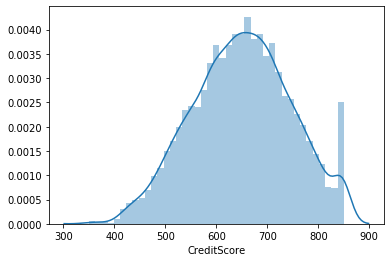

In [13]:
sb.distplot(data.CreditScore)

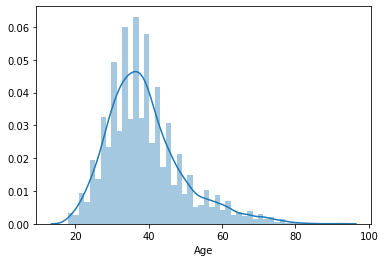

In [14]:
sb.distplot(data.Age)

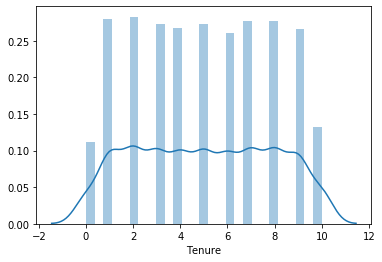

In [15]:
sb.distplot(data.Tenure)

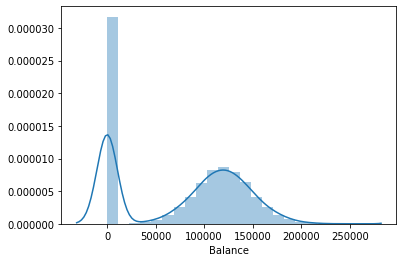

In [16]:
sb.distplot(data.Balance)

In [17]:
# We need to normalize the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [16]:
X = sc.fit_transform(X)

In [17]:
#Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
import keras

Using TensorFlow backend.


In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
classifier = Sequential()

In [32]:
classifier.add(Dense(6, activation = 'relu'))

In [33]:
classifier.add(Dense(6, activation = 'relu'))

In [34]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [40]:
y_train

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [38]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
classifier.fit(X_train, y_train.values, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 220us/step - loss: 0.3366 - accuracy: 0.8604
Epoch 2/100
8000/8000 [==============================] - 2s 216us/step - loss: 0.3373 - accuracy: 0.8620
Epoch 3/100
8000/8000 [==============================] - 2s 228us/step - loss: 0.3373 - accuracy: 0.8631
Epoch 4/100
8000/8000 [==============================] - 2s 216us/step - loss: 0.3364 - accuracy: 0.8627
Epoch 5/100
8000/8000 [==============================] - 2s 209us/step - loss: 0.3373 - accuracy: 0.8611
Epoch 6/100
8000/8000 [==============================] - 2s 230us/step - loss: 0.3364 - accuracy: 0.8640
Epoch 7/100
8000/8000 [==============================] - 2s 208us/step - loss: 0.3366 - accuracy: 0.8622
Epoch 8/100
8000/8000 [==============================] - 2s 236us/step - loss: 0.3370 - accuracy: 0.8619
Epoch 9/100
8000/8000 [==============================] - 2s 243us/step - loss: 0.3366 - accuracy: 0.8621
Epoch 10/100
8000/8000 [==============================]

In [120]:
y_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [122]:
y_pred = y_pred>0.5

In [125]:
confusion_matrix(y_pred,y_test)

array([[1547,  221],
       [  60,  172]])

In [126]:
# confusion_matrix(y_pred,y_test)

In [57]:
(1534+208)/2000

0.871

In [66]:
pd.crosstab(y_pred.flatten(),y_test.values.flatten())

col_0,0,1
row_0,,
False,1534,208
True,73,185


In [68]:
le1.classes_

array(['Female', 'Male'], dtype=object)

In [70]:
le2.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [71]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [99]:
data_list = [[600,0,1,40,3,60000,2,1,1,50000]]

In [107]:
test_df = pd.DataFrame(data_list)
test_df = sc.transform(test_df)

In [111]:
test_df

array([[-0.52281016, -0.90188624,  0.91241915,  0.10281024, -0.69598177,
        -0.26422114,  0.80773656,  0.64609167,  0.97024255, -0.87101922]])

In [118]:
p = classifier.predict(test_df)

In [119]:
p

array([[0.02178157]], dtype=float32)

In [115]:
p = p>0.5

In [116]:
p

array([[False]])

In [127]:
# K-fold cross validation

In [26]:
from keras.wrappers.scikit_learn import  KerasClassifier
from sklearn.model_selection import cross_val_score

In [28]:
def builClassifier():
    classifier = Sequential()
    classifier.add(Dense(6, activation = 'relu'))
    classifier.add(Dense(6, activation = 'relu'))
    classifier.add(Dense(1, activation = 'sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [29]:
classifier = KerasClassifier(build_fn= builClassifier, batch_size = 10, epochs = 100)

In [30]:
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train.values, cv = 10, n_jobs=-1)

In [31]:
accuracies

array([0.87625003, 0.86374998, 0.83749998, 0.84125   , 0.86750001,
       0.88      , 0.85750002, 0.83375001, 0.85374999, 0.85624999])

In [33]:
accuracies.std()

0.014949920669723303

In [34]:
accuracies.mean()

0.8567499995231629

In [35]:
## This is an example of overfitting , as accuracy ranges from 83% to 88%

In [39]:
# Hence we will use dropout regularization and use grid search for hypertuning the model

In [23]:
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

In [27]:
def builClassifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(6, activation = 'relu'))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(6, activation = 'relu'))
    classifier.add(Dropout(p=0.1))
    classifier.add(Dense(1, activation = 'sigmoid'))
    classifier.compile(optimizer= optimizer,loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [28]:
classifier = KerasClassifier(build_fn= builClassifier)

In [29]:
parameters = {
    'batch_size' : [25,32],
    'nb_epoch' : [100,500],
    'optimizer' : ['adam','rmsprop']
}

In [30]:
grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

In [ ]:
grid_search_fit = grid_search.fit(X_train,y_train.values)

/home/skdie/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
best_parameters = grid_search_fit.best_param_

In [ ]:
best_accuracy = grid_search_fit.best_score_

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [88]:
f_acc = 0
ij = 0
for i in range(82,1000,20):
    r = RandomForestClassifier(n_estimators=180,
                          random_state=i,
                          n_jobs=-1)
    r.fit(X_train,y_train)
    y_pred = r.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(i,acc)
    if acc> f_acc:
        f_acc = acc
        ij = i

/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


82 0.8715


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


102 0.8675


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


122 0.866


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


142 0.8665


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


162 0.866


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


182 0.867


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


202 0.8655


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


222 0.869


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


242 0.8655


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


262 0.871


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


282 0.87


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


302 0.867


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


322 0.869


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


342 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


362 0.865


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


382 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


402 0.8685


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


422 0.8645


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


442 0.8685


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


462 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


482 0.87


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


502 0.87


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


522 0.8665


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


542 0.8645


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


562 0.865


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


582 0.866


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


602 0.8725


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


622 0.866


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


642 0.8665


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


662 0.8655


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


682 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


702 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


722 0.871


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


742 0.867


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


762 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


782 0.869


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


802 0.8645


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


822 0.8685


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


842 0.868


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


862 0.8675


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


882 0.8625


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


902 0.87


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


922 0.869


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


942 0.867


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


962 0.866


/home/skdie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


982 0.87


In [89]:
print(f_acc,ij)

0.8725 602


In [85]:
i = range(0,10,1)

In [87]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8


In [90]:
accuracy_score(y_test, y_pred)

0.87

In [91]:
(1558+183)/2000

0.8705